In [90]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os

In [100]:
numSamples = 204

base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
dataset = pd.read_excel(base_dir+'\_data\HOA_PD_SRM_Output_StatsTable__05-Jun-2024.xlsx')


### Extract the Inputs and Outputs of the Model

In [102]:
input = dataset.iloc[:, 43:47]
input_arr = input.to_numpy()

output = dataset.iloc[:, 79:87]
output_arr = output.to_numpy()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(input_arr, output_arr, test_size=0.3, train_size=0.7)

[[8.86802820e+00 4.67883411e-03 7.25358066e-10 1.20725838e-01]
 [5.47252476e+00 5.35964499e-03 3.06727038e-08 1.17503862e-01]
 [3.57246941e+00 8.05934321e-04 4.90210194e-03 1.10458036e-01]
 [5.82512064e+00 8.00181303e-03 8.10046243e-08 1.25151450e-01]
 [4.95345871e+00 2.77522133e-03 2.43310100e-08 1.13534657e-01]
 [2.91382927e+00 3.25936695e-03 1.16461203e-02 1.14667838e-01]
 [7.67476516e+00 1.18484070e-02 2.88447504e-09 1.18749375e-01]
 [4.46766943e+00 5.85094940e-03 1.64286592e-09 1.20476743e-01]
 [4.41851220e+00 2.35009769e-03 3.56945725e-09 1.08584681e-01]
 [8.03590081e+00 1.51523971e-02 2.89982729e-09 1.24273018e-01]
 [4.44786019e+00 1.97448091e-02 2.09810775e-09 1.16302736e-01]
 [4.12403006e+00 1.61764912e-02 2.35468848e-09 1.15546126e-01]
 [7.26811024e+00 2.69843392e-09 3.99999979e-02 2.20002115e-02]
 [5.21452548e+00 6.26664508e-03 3.99999899e-02 9.99999941e-02]
 [3.98074917e+00 5.50046179e-03 3.40228048e-02 9.48403824e-02]
 [9.35046943e+00 2.20920712e-02 3.99988492e-02 9.999983

### Complete PCA and find Principal Components

In [93]:
def runPCA(trainData, testData, components):
    scaling = StandardScaler()
    scaled_train = scaling.fit_transform(trainData)
    scaled_test = scaling.transform(testData)

    principal_comp = PCA(n_components=components)
    x_train = principal_comp.fit_transform(scaled_train)
    x_test = principal_comp.transform(scaled_test) ##transformed dataset

    return x_train, x_test, principal_comp, scaling

##PCA with Input Features
input_pca = runPCA(Xtrain, Xtest, 2)
x_train = input_pca[0]
x_test = input_pca[1]
print("X = \n", "Training= \n", x_train, "\n Testing= \n", x_test)
# print(x.shape)
pca_in = input_pca[2]
# scale = input_pca[3]
# print(pca_in, scale)

X = 
 Training= 
 [[-1.08715715e+00 -4.44652059e-01]
 [ 1.06198237e-01 -8.44034624e-01]
 [ 6.71668452e-01 -8.51596904e-01]
 [ 2.45652652e+00  2.19343027e+00]
 [-1.21281439e+00 -6.19899010e-01]
 [-9.82625969e-01 -1.01115449e-01]
 [ 1.63012742e+00 -1.12695911e+00]
 [ 1.42124984e+00 -9.18214787e-01]
 [-4.27229463e-01 -3.60623864e-01]
 [ 5.45856000e-01 -8.94686370e-01]
 [-4.20886748e-01 -6.44745039e-01]
 [-3.47897167e-01 -4.69227928e-01]
 [-3.92332546e-01 -3.32048132e-01]
 [-3.06743022e-01 -3.60862686e-01]
 [ 2.93168531e-01 -5.28173438e-01]
 [-1.10959341e+00 -4.39004870e-01]
 [-5.26689842e-01  6.88937948e-01]
 [-1.63015739e-01 -1.77215893e-01]
 [-1.10769404e+00 -3.36803752e-01]
 [-1.63224223e-01 -3.80224864e-01]
 [ 1.06887311e+00 -6.77842546e-01]
 [-6.70560305e-01 -1.65444032e-01]
 [ 2.99104837e-01 -4.26316301e-01]
 [-3.04698936e+00  1.54772863e+00]
 [-8.76891340e-01  5.20078927e-01]
 [-1.42152700e-01 -2.91551534e-01]
 [-2.50988559e-02 -4.28519974e-01]
 [-5.47860962e-03 -4.27439341e-01]
 [

In [103]:
##PCA with Output Features
output_pca = runPCA(Ytrain, Ytest, 2)
y_train = output_pca[0]
y_test = output_pca[1]
print("Y = \n", "Training= \n", y_train, "\n Testing= \n", y_test)
# print(x.shape)
pca_out = output_pca[2]

Y = 
 Training= 
 [[ 7.53083370e-01  6.38868147e-01]
 [-4.86345935e-01  1.97700833e+00]
 [ 9.67372146e-01  6.04564858e-01]
 [-1.79856303e+00 -1.35202546e+00]
 [-9.21538734e-01 -1.27520812e+00]
 [-4.92771451e-02  9.20246810e-01]
 [-1.98978355e-01 -8.35431037e-01]
 [ 5.10372296e-01 -2.47979806e-01]
 [-5.96636091e-01 -1.92656798e+00]
 [-3.10168112e-01 -7.03779546e-01]
 [-1.39953474e+00  1.03124175e+00]
 [ 6.27243936e-01 -6.90614588e-03]
 [ 3.15304412e+00 -2.89720823e+00]
 [ 2.61547092e+00 -6.41566382e-01]
 [ 1.59655815e+00  1.42180002e+00]
 [ 4.18556473e+00 -2.21703100e+00]
 [ 4.54414379e+00 -1.48892072e+00]
 [-8.54614520e-01 -8.68906563e-01]
 [ 1.93529628e+00  3.39950475e+00]
 [ 1.45194682e-01  9.80974222e-01]
 [-1.86487038e+00 -2.24353446e+00]
 [-1.71265291e+00 -1.20479651e+00]
 [-6.26027490e-01  1.53972718e+00]
 [-7.73338915e-01  9.54824315e-02]
 [ 2.35975191e+00 -2.40696399e+00]
 [-2.01351288e+00  1.68680826e+00]
 [ 8.16256462e-01 -2.40997839e+00]
 [-2.18156153e+00  4.94581234e-01]
 [

### Metrics and Principal Components

In [95]:
def getMetrics(principal):
    print("Principal Components = \n", principal.components_)
    print("Variance Ratio = \n", principal.explained_variance_ratio_)
print("Input (X):")
getMetrics(pca_in)
print("\nOutput (Y):")
getMetrics(pca_out)

Input (X):
Principal Components = 
 [[ 0.55317889  0.61722225  0.26501386  0.49274483]
 [ 0.08272751 -0.05473425  0.86601364 -0.49008233]]
Variance Ratio = 
 [0.43061972 0.25128243]

Output (Y):
Principal Components = 
 [[ 0.53317436  0.16654742 -0.22105798  0.3685284   0.62650006 -0.07002049
  -0.11529702  0.3043167 ]
 [ 0.34156652  0.46745273  0.2711307  -0.42055763  0.18252237 -0.17242187
   0.44066649 -0.39649591]]
Variance Ratio = 
 [0.22654538 0.20593737]


### Generate Plots

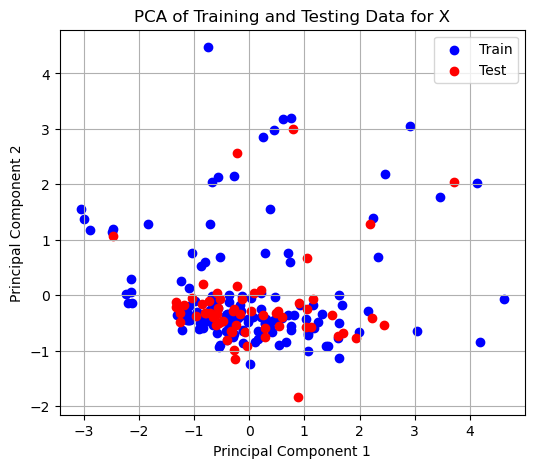

In [96]:
xplot_pca = plt.figure(figsize=(6, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], c='blue', label='Train')
plt.scatter(x_test[:, 0], x_test[:, 1], c='red', label='Test')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training and Testing Data for X')
plt.legend()
plt.grid(True)
plt.show()

xplot_pca.savefig(base_dir + "/_images/PCA_X.jpg")

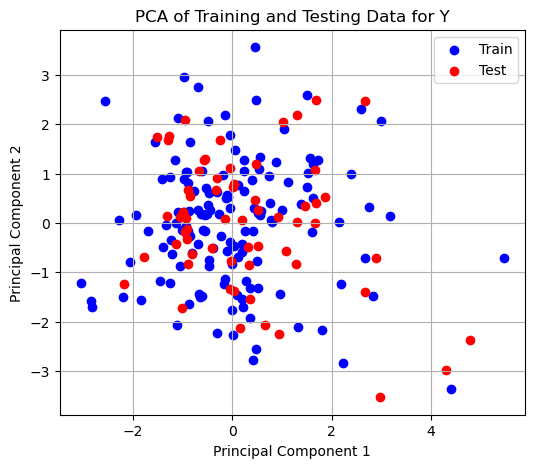

In [97]:
yplot_pca = plt.figure(figsize=(6, 5))
plt.scatter(y_train[:, 0], y_train[:, 1], c='blue', label='Train')
plt.scatter(y_test[:, 0], y_test[:, 1], c='red', label='Test')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training and Testing Data for Y')
plt.legend()
plt.grid(True)
plt.show()

yplot_pca.savefig(base_dir + "/_images/PCA_Y.jpg")